In [1]:
# Data cleaning for water surface temperature dataset
# Location: Scripps Pier, La Jolla Shores, San Diego, CA

In [2]:
# dependencies
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import csv

In [3]:
# Creating path for water surface temperature of La Jolla
SURF_PATH = os.path.join("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/Water Temp/water_surface_temp.csv")

def load_surftemp_data(surf_path=SURF_PATH):
    temp_path = os.path.join(surf_path)
    return pd.read_csv(temp_path)

surf_pd = load_surftemp_data()
surf_pd.head()

,YEAR,MONTH,DAY,TIME_PST,TIME_FLAG,SURF_TEMP_C,SURF_FLAG,BOT_TEMP_C,BOT_FLAG,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1916.0,8.0,22.0,NaN,NaN,19.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1916.0,8.0,23.0,NaN,NaN,19.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1916.0,8.0,24.0,NaN,NaN,19.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1916.0,8.0,25.0,NaN,NaN,19.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1916.0,8.0,26.0,NaN,NaN,19.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Removing columns not needed from Surface Temperature dataframe
surf_temp_pd = surf_pd.drop(['TIME_PST', 'MONTH', 'DAY', 'TIME_FLAG', 'SURF_FLAG', 'BOT_FLAG', 'Unnamed: 9',
                            'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
                             'Unnamed: 13'], axis=1)
surf_temp_pd.head()

,YEAR,SURF_TEMP_C,BOT_TEMP_C
0,1916.0,19.5,NaN
1,1916.0,19.9,NaN
2,1916.0,19.7,NaN
3,1916.0,19.7,NaN
4,1916.0,19.5,NaN


In [18]:
# Removing all rows of column 'SURF_TEMP_C' with values 'NaN'
surf_temp_drop = surf_temp_pd.dropna(subset = ['SURF_TEMP_C'])
surf_temp_clean = surf_temp_drop.rename(columns={'YEAR':'Year',
                                                 'SURF_TEMP_C':'Surface Temperature',
                                                 'BOT_TEMP_C':'Sea Floor Temperature'})
surf_temp_clean.head()

,Year,Surface Temperature,Sea Floor Temperature
0,1916.0,19.5,NaN
1,1916.0,19.9,NaN
2,1916.0,19.7,NaN
3,1916.0,19.7,NaN
4,1916.0,19.5,NaN


In [9]:
# Mean of each year
surf_temp_mean = surf_temp_clean.groupby('Year').mean().reset_index()
surf_temp_mean.head()

,Year,Surface Temperature,Sea Floor Temperature
0,1916.0,15.641818,NaN
1,1917.0,16.742715,NaN
2,1918.0,17.385113,NaN
3,1919.0,16.810032,NaN
4,1920.0,16.576177,NaN


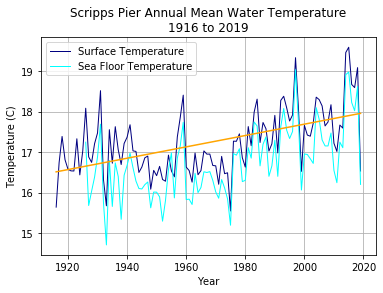

In [58]:
# Line graph of the mean Surface and Bottom Temperature over time

# setting axes
x_axis = surf_temp_mean['Year']
surface_y = surf_temp_mean['Surface Temperature']
bottom_y = surf_temp_mean['Sea Floor Temperature']

# handles for creating legend 
surf_temp, = plt.plot(x_axis, surface_y, linewidth=1, color='Navy', 
                      label="Surface Temperature")
bottom_temp, = plt.plot(x_axis, bottom_y, linewidth=1, color='cyan', 
                        label="Sea Floor Temperature")

# legend, title, and label elements
plt.legend(loc = "upper left") # sets location of legend in upper left corner
plt.title(f"""Scripps Pier Annual Mean Water Temperature
1916 to 2019""")
plt.xlabel("Year")
plt.ylabel("Temperature (C)")

# trendline 
z = np.polyfit(x_axis, surface_y, 1)
p = np.poly1d(z) # function which takes in x and returns an estimate for y
plt.plot(x_axis, p(x_axis), "orange") # plots trendline
plt.grid()

# saves an image of the above chart to view in Class Data folder
plt.savefig("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/Water Temp/scripps_water_temp.png")
plt.show()

In [27]:
# Sea floor temperature will not be needed further in the data analysis process. 
# It's sole purpose was to present a visualization of the differences in the 
    # temperatures.
# There is not a uniform change in temperature for each data point, likely due to 
    # current flow and minor changes in sea floor height -- important factors nonetheless, 
    # but are beyond the scope of this project. 

In [28]:
# Importing importing sea level height data

SEALEVEL_PATH = os.path.join("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/Water Temp/sealevel_clean.csv")

def load_sealevel_data(sealevel_path=SEALEVEL_PATH):
    sealev_path = os.path.join(sealevel_path)
    return pd.read_csv(sealev_path)

sealevel_pd = load_sealevel_data()
sealevel_pd.head()

,Unnamed: 0,Year,MSL
0,0,1924,-0.225
1,1,1924,-0.195
2,2,1925,-0.198
3,3,1925,-0.207
4,4,1925,-0.150


In [29]:
# Dropping and renaming columns for further cleaning of Sea Level data
sealevel_rename = sealevel_pd.rename(columns = {'MSL':'Mean Sea Level (m)'})
sealevel_new = sealevel_rename.drop(columns = ['Unnamed: 0'])
sealevel_new.head()

,Year,Mean Sea Level (m)
0,1924,-0.225
1,1924,-0.195
2,1925,-0.198
3,1925,-0.207
4,1925,-0.150


In [42]:
# Grouping and setting new initial value for Sea Level Data
sea_level_yr = sealevel_new.groupby('Year').mean().reset_index()
sea_1969 = sea_level_yr[sea_level_yr["Year"] >= 1969].reset_index()
sea_1969.head()

,index,Year,Mean Sea Level (m)
0,44,1969,-0.038000
1,45,1970,-0.069583
2,46,1971,-0.096833
3,47,1972,-0.024833
4,48,1973,-0.097000


In [43]:
# Starting temperature dataframe at 1969
surf_temp_69 = surf_temp_mean[surf_temp_mean["Year"] >= 1969].reset_index()
surf_temp_69.head()

,index,Year,Surface Temperature,Sea Floor Temperature
0,53,1969.0,16.669315,16.301918
1,54,1970.0,16.660440,16.016484
2,55,1971.0,16.205753,15.860912
3,56,1972.0,16.893443,16.322222
4,57,1973.0,16.466849,16.113636


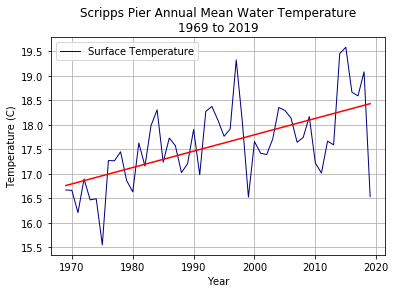

In [63]:
# Line graph of the mean Surface and Bottom Temperature over time from 1969 to 2019

# setting axes
x_axis = surf_temp_69['Year']
surf_y = surf_temp_69['Surface Temperature']

# handles for creating legend 
surface_temp, = plt.plot(x_axis, surf_y, linewidth=1, color='Navy', 
                      label="Surface Temperature")

# legend, title, and label elements
plt.legend(loc = "upper left") # sets location of legend in upper left corner
plt.title(f"""Scripps Pier Annual Mean Water Temperature
1969 to 2019""")
plt.xlabel("Year")
plt.ylabel("Temperature (C)")

# trendline 
z = np.polyfit(x_axis, surf_y, 1)
p = np.poly1d(z) # function which takes in x and returns an estimate for y
plt.plot(x_axis, p(x_axis), "-r") # plots trendline
plt.grid()

# saves an image of the above chart to view in Class Data folder
plt.savefig("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/Water Temp/scripps_water_temp_1969.png")
plt.show()

In [64]:
# Line graph of the mean Surface and Bottom Temperature over time
x_axis = sea_1969['Year']

surface_y = surf_temp_69['Surface Temperature']
sealevel_y = sea_1969['Mean Sea Level (m)']

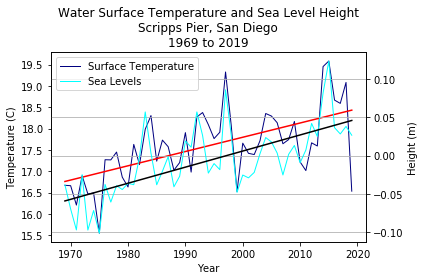

In [66]:
fig, ax1 = plt.subplots()

# axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (C)')

# legend handle
surf_temp, = ax1.plot(x_axis, surface_y, linewidth=1, color='Navy', 
                      label="Surface Temperature")

# identical x-axis for plotting 2 y-axes
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Height (m)') # second y-axis label
# second legend handle
sea_height, = ax2.plot(x_axis, sealevel_y, linewidth=1, color='cyan', 
                       label="Sea Levels")

# title and legend
plt.title(f"""Water Surface Temperature and Sea Level Height
Scripps Pier, San Diego
1969 to 2019""")
plt.legend(loc = 'upper left') # set legend location to upper left corner

fig.tight_layout()
plt.grid()

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines, [line.get_label() for line in lines], loc='best')

# adding trendlines
z = np.polyfit(x_axis, surface_y, 1) # trendline for surface temperature
m = np.polyfit(x_axis, sealevel_y, 1) # trendline for sea level height
p = np.poly1d(z)
q = np.poly1d(m)
ax1.plot(x_axis, p(x_axis), "-r")
ax2.plot(x_axis, q(x_axis), "-k")

# saves an image of the above chart to view in Class Data folder
plt.savefig("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/Water Temp/temp_seal.png")
plt.show()

In [67]:
# null: There is no relationship between sea level height and water surface 
    # temperature.

# alternate: As sea level height increases, there is an increase in water surface 
    # temperature. 

In [68]:
# T-test for water surface temperature and sea level height
stats.ttest_ind(surface_y, sealevel_y, equal_var=False)

Ttest_indResult(statistic=148.9277666990509, pvalue=3.3253990021798815e-68)

In [69]:
# T-test for 2 independent samples. Test statistic is found to be 148.93.
# P-value << 0.05. P-value = 3.325e-68. Therefore, we can reject the null hypothesis. 

In [70]:
# Dataframe for surface temperature and sea level height
values = pd.DataFrame({
    'Year': surf_temp_69['Year'],
    'Surface Temperature': surf_temp_69['Surface Temperature'],
    'Height(m)': sea_1969['Mean Sea Level (m)'],
})
values.head()

,Year,Surface Temperature,Height(m)
0,1969.0,16.669315,-0.038000
1,1970.0,16.660440,-0.069583
2,1971.0,16.205753,-0.096833
3,1972.0,16.893443,-0.024833
4,1973.0,16.466849,-0.097000


In [71]:
# Performing test to find Pearson correlation coefficient
pearson_corr = values[['Surface Temperature', 'Height(m)']].corr(method="pearson")
pearson_corr

,Surface Temperature,Height(m)
Surface Temperature,1.000000,0.833969
Height(m),0.833969,1.000000


In [56]:
# Pearson correlation coefficient, r is equal to 0.834. 
# Such a correlation coefficient value is indicative of a strong linear relationship
    # between sea level height and water surface temperature.